In [2]:
!pip install opencv-python

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!ls "/content/drive/My Drive/dataset"

cccd1.png    cccdmp.png		  img_mark_zone_6.jpg  model_dudoangiacophieu.hdf5
cccddmp.png  img_mark_zone_5.jpg  img_mark_zone.jpg    tmpcccd.png


In [5]:
import cv2
import os
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pylab

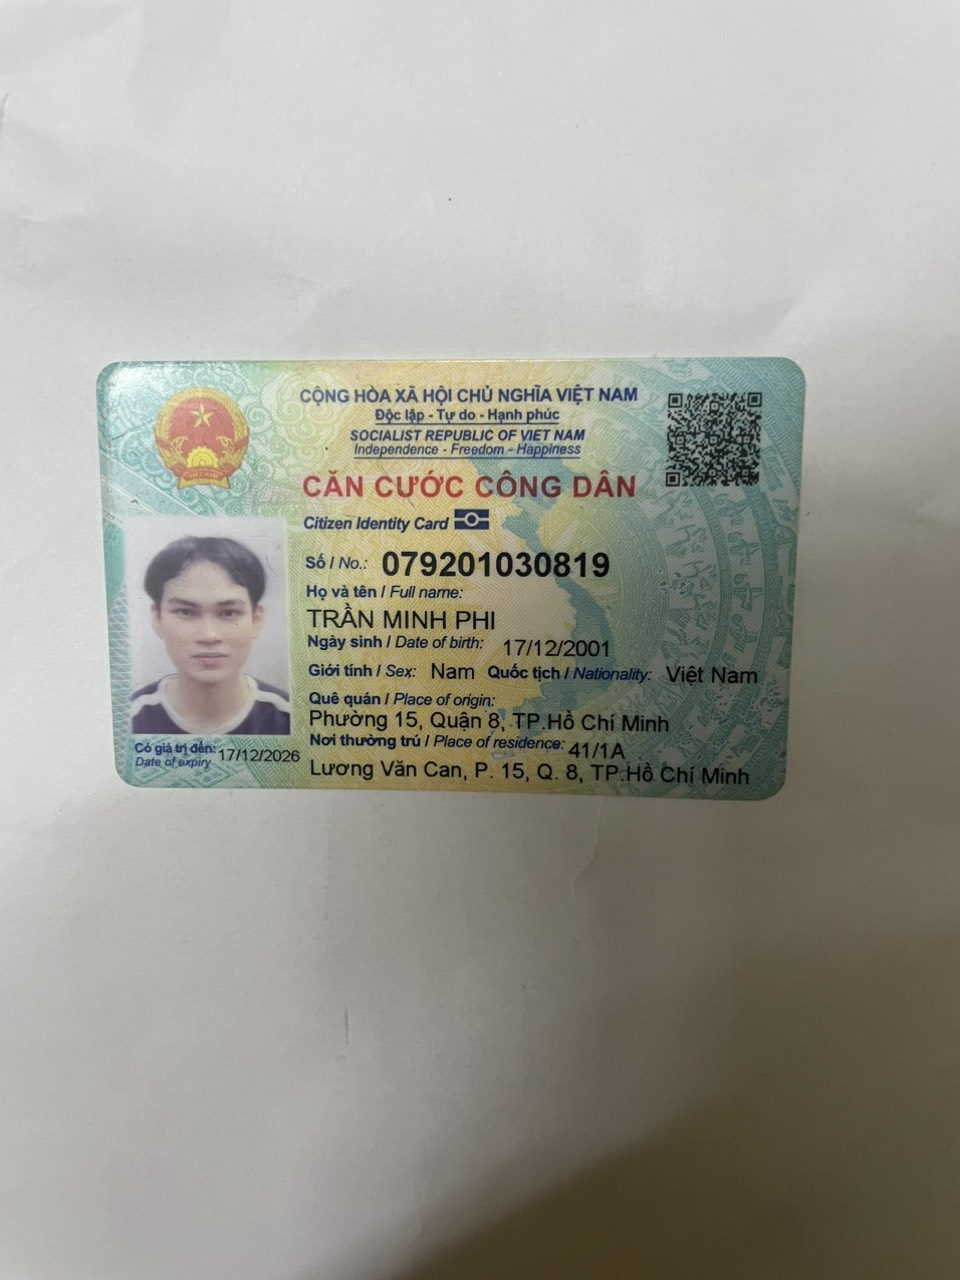

In [37]:
os.getcwd()
os.chdir("/content/drive/My Drive/dataset")
#read image
img_original = cv2.imread('tmpcccd.png')
cv2_imshow(img_original)

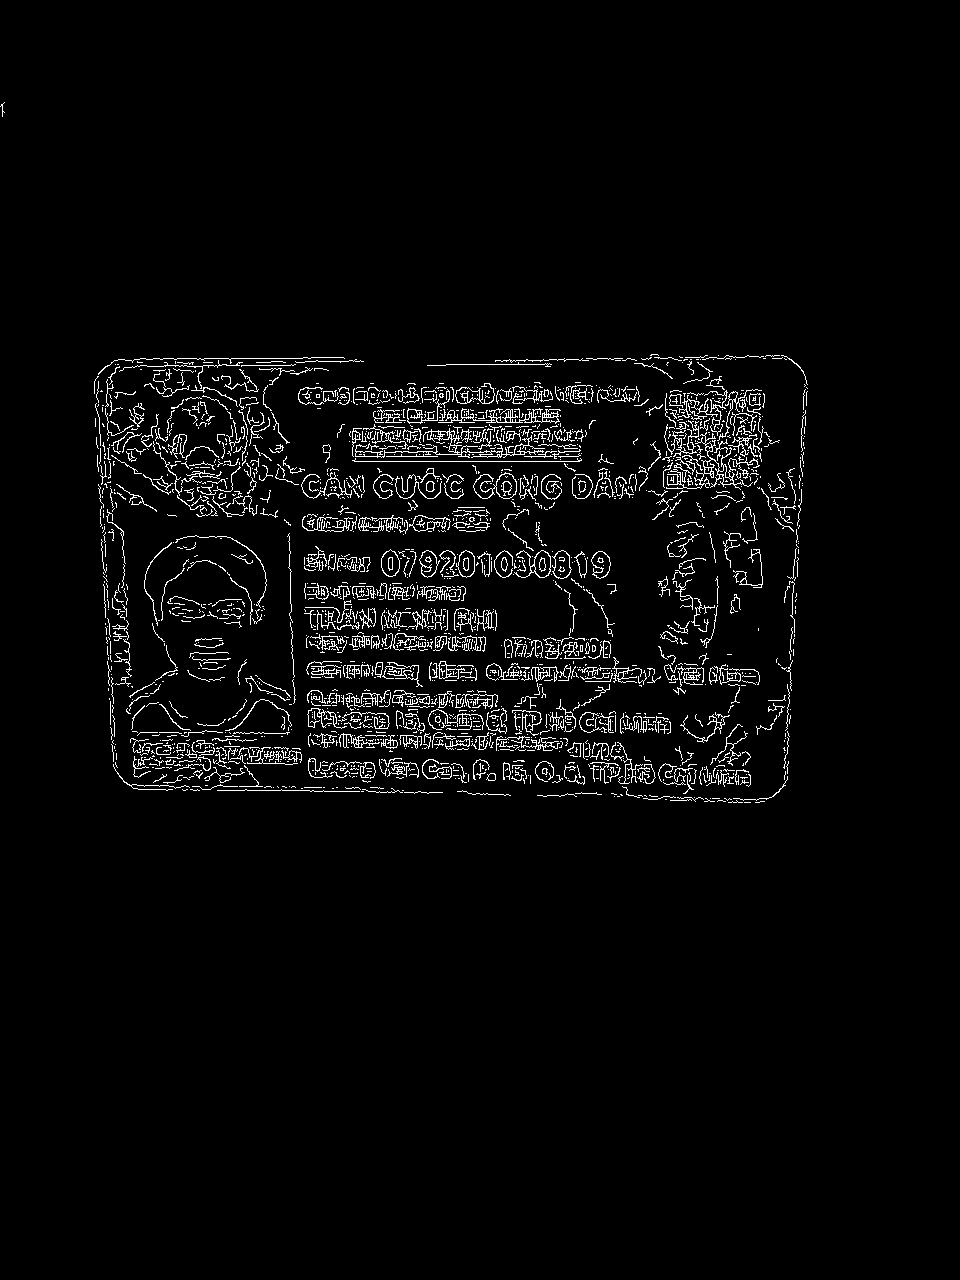

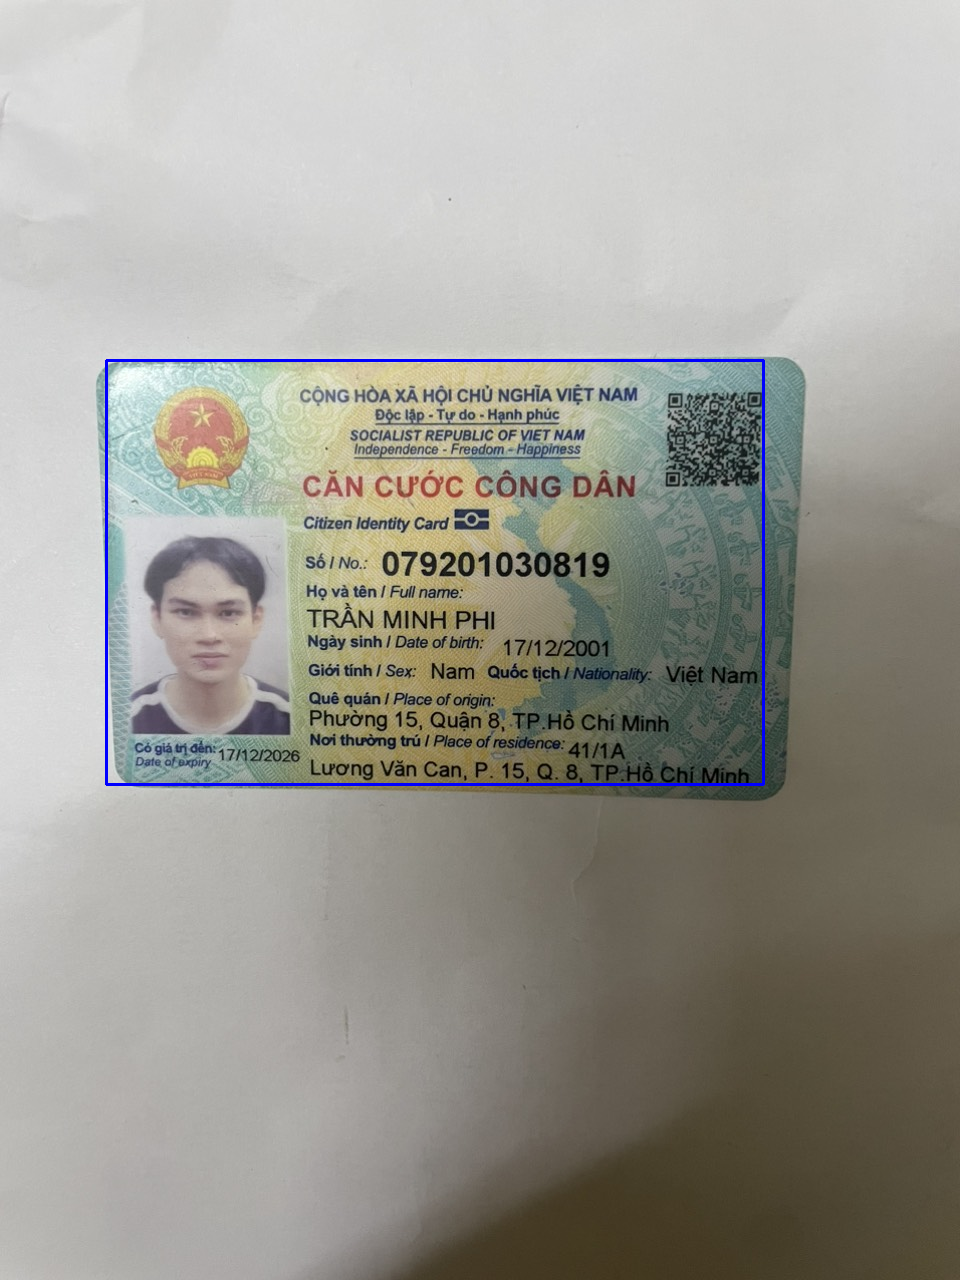

In [36]:
imgContours = img_original.copy()
imgGray = cv2.cvtColor(img_original, cv2.COLOR_BGR2GRAY)
imgBlur = cv2.GaussianBlur(imgGray, (7,7), 50)
imgCanny = cv2.Canny(imgBlur,10,35)
contours, hierarchy = cv2.findContours(imgCanny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
img_copy1 = img_original.copy()
cv2_imshow(imgCanny)

max_contour = sorted(contours, key=cv2.contourArea, reverse=True)
# Get rectangles for each contour and merge overlapping rectangles
rects = []
for c in max_contour[1:]:
    area = cv2.contourArea(c)
    if area > 15:
      rect = cv2.boundingRect(c)
      rects.append(rect)
final_rects, weights = cv2.groupRectangles(rects, groupThreshold=0)

# Initialize variables to hold the largest and smallest coordinates
min_x = float('inf')
max_x = float('-inf')
min_y = float('inf')
max_y = float('-inf')
# Iterate through each rectangle and update the largest and smallest coordinates
for rect in final_rects:
    x1, y1, w, h = rect
    x2 = x1 + w
    y2 = y1 + h
    if x1 < min_x:
        min_x = x1
    if x2 > max_x:
        max_x = x2
    if y1 < min_y:
        min_y = y1
    if y2 > max_y:
        max_y = y2

cv2.rectangle(imgContours, (max_x, max_y), (min_x, min_y), (255, 0, 0), 2)

# Extract the portion of the image within the rectangle
cv2_imshow(imgContours)
#cv2.waitKey(0)
#----------------------------------------find biggest rect-------------------------------------
#print(contours)


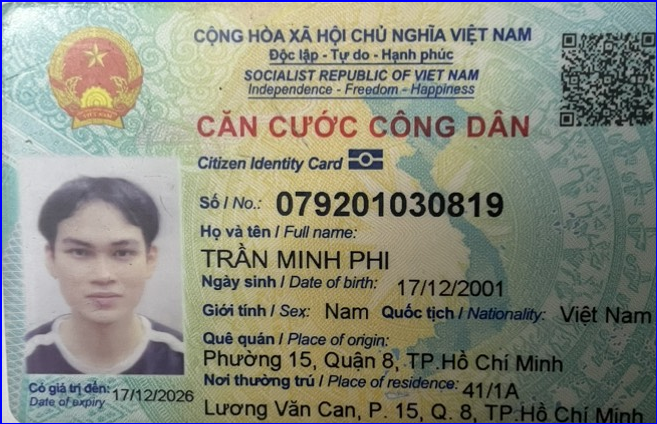

In [38]:
img_mark_zone_6 = imgContours[min_y:max_y, min_x:max_x]
cv2.imwrite('img_mark_zone_6.jpg', img_mark_zone_6)
cv2_imshow(img_mark_zone_6)

In [9]:
!pip install easyocr

In [10]:
import easyocr

In [11]:
reader = easyocr.Reader( ['vi'], gpu = False)
result = reader.readtext(img_mark_zone_6)

In [12]:
print(result)

[([[190, 22], [536, 22], [536, 48], [190, 48]], 'CỘNG HOA XÃ HỘl CHỦ NGHĨA VIÉT NAM', 0.27044350088892344), ([[265, 45], [321, 45], [321, 65], [265, 65]], 'Độc láp', 0.1976875802401572), ([[329, 45], [457, 45], [457, 65], [329, 65]], 'Ty do - Hanh phúc', 0.3351610296250116), ([[243, 65], [413, 65], [413, 85], [243, 85]], 'SOCIALIST REPUBLIC OF', 0.891000434160416), ([[447, 69], [481, 69], [481, 83], [447, 83]], 'NAM', 0.9378491780221756), ([[247, 83], [335, 83], [335, 99], [247, 99]], 'Indepondence', 0.8563248270883932), ([[343, 83], [401, 83], [401, 99], [343, 99]], 'Freodom_', 0.8051200017828963), ([[402, 60], [482, 60], [482, 108], [402, 108]], 'Pernan', 0.06889347235421509), ([[193, 105], [535, 105], [535, 145], [193, 145]], 'CĂN CƯỚC CÔNG DÂN', 0.9905489676303378), ([[193, 150], [376, 150], [376, 176], [193, 176]], 'Citizen Identity Card  0', 0.6977651734327894), ([[196, 190], [266, 190], [266, 214], [196, 214]], 'Số/ No:', 0.5735415811308109), ([[273, 187], [509, 187], [509, 223]

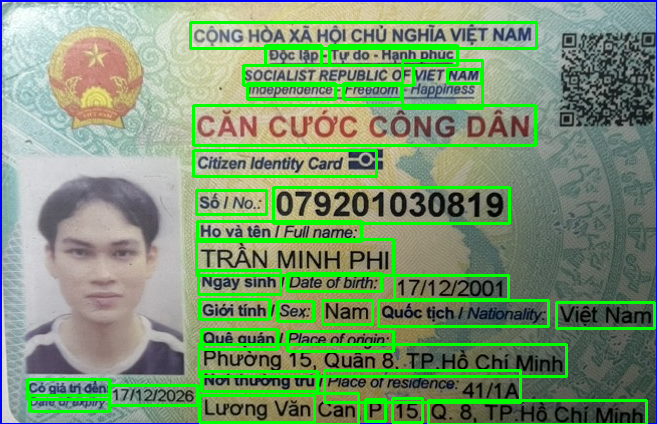

In [16]:
def cleanup_text(text):
	# strip out non-ASCII text so we can draw the text on the image
	# using OpenCV
	return "".join([c if ord(c) < 128 else "" for c in text]).strip()

for res in result:
  # print('Coordinate: ', res[0], 'Text: ', res[1])
  # unpack the bounding box
  (tl, tr, br, bl) = res[0]
  tl = (int(tl[0]), int(tl[1]))
  tr = (int(tr[0]), int(tr[1]))
  br = (int(br[0]), int(br[1]))
  bl = (int(bl[0]), int(bl[1]))
  cv2.rectangle(img_mark_zone_6, tl, br, (0, 255, 0), 2)
cv2_imshow(img_mark_zone_6)  # cleanup the text and draw the box surrounding the text along
  #cv2.putText(img, text, (tl[0], tl[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 200), 2)

In [27]:
a = []
for res in result:
  text = cleanup_text(res[1])
  a.append(text)
  print(text)
print(a)

CNG HOA X Hl CH NGHA VIT NAM
c lp
Ty do - Hanh phc
SOCIALIST REPUBLIC OF
NAM
Indepondence
Freodom_
Pernan
CN CC CNG DN
Citizen Identity Card  0
S/ No:
079201030819
H v tn / Full name:
TRN MINH PHI
Ngy sinh
Date of birth:
17/12/2001
Gii tnh
Sex:
Nam
Quc tch / Nationality:
Vit Nam
Qu qun
Place of origin:
Phng 15, Qun 8, TP H Ch Minh
Cgi j 0n
Noi thung tr
Place of residence: 41/1A
Dale ol erpiry
17/12/2026
Lng Vn
P
15
Q8 IPH ChMinh
Can
['CNG HOA X Hl CH NGHA VIT NAM', 'c lp', 'Ty do - Hanh phc', 'SOCIALIST REPUBLIC OF', 'NAM', 'Indepondence', 'Freodom_', 'Pernan', 'CN CC CNG DN', 'Citizen Identity Card  0', 'S/ No:', '079201030819', 'H v tn / Full name:', 'TRN MINH PHI', 'Ngy sinh', 'Date of birth:', '17/12/2001', 'Gii tnh', 'Sex:', 'Nam', 'Quc tch / Nationality:', 'Vit Nam', 'Qu qun', 'Place of origin:', 'Phng 15, Qun 8, TP H Ch Minh', 'Cgi j 0n', 'Noi thung tr', 'Place of residence: 41/1A', 'Dale ol erpiry', '17/12/2026', 'Lng Vn', 'P', '15', 'Q8 IPH ChMinh', 'Can']


In [28]:
!pip install textblob

In [39]:
#correct spelling in English
from textblob import TextBlob
for correct in a:
  correct = TextBlob(correct)
  corrected_text = correct.correct()
  print("Corrected text:", corrected_text)
print(a)



Corrected text: CNG HOA X Ll of NGHA VIT NAM
Corrected text: c up
Corrected text: By do - And the
Corrected text: SOCIALIST REPUBLIC of
Corrected text: NAM
Corrected text: Independence
Corrected text: Freodom_
Corrected text: German
Corrected text: of of CNG of
Corrected text: Citizen Identity Hard  0
Corrected text: S/ To:
Corrected text: 079201030819
Corrected text: H v to / Full name:
Corrected text: TRN MINH PHI
Corrected text: By sigh
Corrected text: Late of birth:
Corrected text: 17/12/2001
Corrected text: Iii th
Corrected text: Ex:
Corrected text: Am
Corrected text: Duc th / Nationality:
Corrected text: It Am
Corrected text: U run
Corrected text: Place of origin:
Corrected text: Long 15, Run 8, of H Oh In
Corrected text: I j in
Corrected text: Roi thing tr
Corrected text: Place of residence: 41/Of
Corrected text: Pale of empire
Corrected text: 17/12/2026
Corrected text: Ing In
Corrected text: P
Corrected text: 15
Corrected text: Of IPH ChMinh
Corrected text: An
['CNG HOA X Hl CH

In [40]:
#correct spelling in Vietnamese
#!pip install transformers
#from transformers import pipeline

#corrector = pipeline(a, model="bmd1905/vietnamese-correction")